### Treść zadania

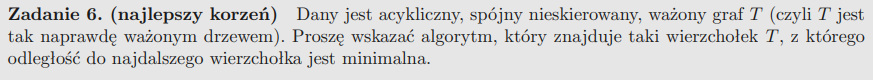

# Sposób I (gorszy)

### Omówienie algorytmu

Najprostszym algorytmem jest po prostu wyznaczenie odległości od najdalszego liścia dla każdego z wierzchołków. Najłatwiej tego dokonamy, przy pomocy algorytmu DFS/BFS, przechodząc po grafie i zapisując odległości bieżącego wierzchołka od pozostałych. Ponieważ graf jest grafem acyklicznym nieskierowanym, możemy zastosować tak prosty algorytm do wyznaczania długości ścieżek ważonych. Po każdym takim przejściu zwracamy maksimum z wyznaczonych odległości dla danego wierzchołka i jeżeli jest ono mniejsze od poprzedniego najmniejszego maksimum, zapisujemy ten wierzchołek oraz jego maksymalną odległość od pozostałych wierzchołków.
###### UWAGA
Algorytm działa prawidłowo również dla drzew o ujemnych wagach krawędzi. Choć nie ma to sensu dla długości, bo nie istnieją normalnie ujemne długości, to algorytm jest poprawny.

### Złożoność

###### Obliczeniowa:
$ O(V \cdot (V + E)) = | E = V - 1 | = O(V \cdot (V + V - 1)) = O(V^2) $  - w drzewie o $ V $ wierzchołkach zawsze jest maksymalnie $ V - 1 $ krawędzi (dokładnie $ V - 1 $, gdy drzewo jest spójne)
###### Pamięciowa:
$ O(V) $

### Implementacja

In [2]:
def best_root(T: 'undirected weighted tree'):
    n = len(T)
    visited = [0] * n
    token = 1
    
    def dfs(u):
        visited[u] = token
        max_dist = 0
        for v, weight in T[u]:
            if visited[v] != token:
                dist = dfs(v) + weight
                if dist > max_dist:
                    max_dist = dist
        return max_dist
    
    # Minimized value of a maximum distance
    min_max_dist = float('inf')
    best_u = 0
    for u in range(n):
        max_dist = dfs(u)
        if max_dist < min_max_dist:
            min_max_dist = max_dist
            best_u = u
        token += 1
            
    return best_u, min_max_dist

###### Kilka testów

##### Pomocnicze

In [3]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

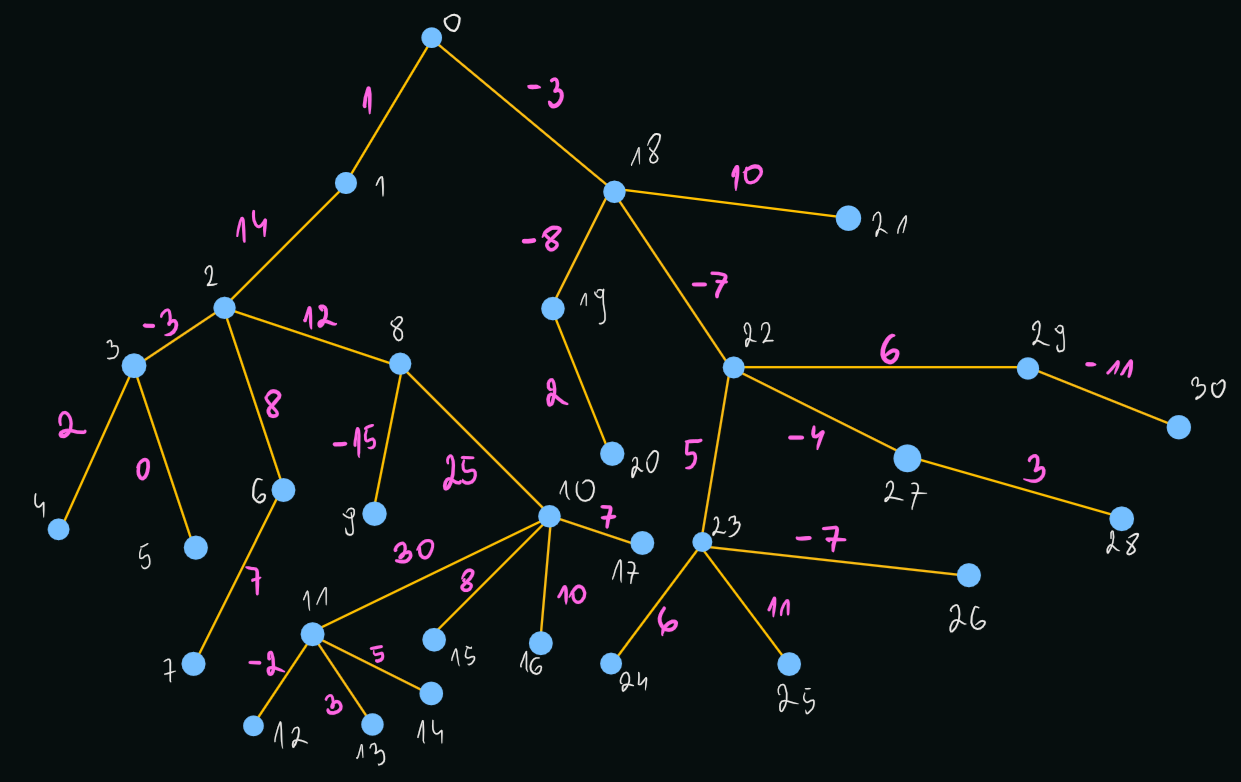

In [4]:
E = [(0, 1, 1), (1, 2, 14), (2, 3, -3), (3, 4, 2), (3, 5, 0), (2, 6, 8), (6, 7, 7), (2, 8, 12), 
     (8, 9, -15), (8, 10, 25), (10, 17, 7), (10, 16, 10), (10, 15, 8), (10, 11, 30), (11, 12, -2), 
     (11, 13, 3), (11, 14, 5), (0, 18, -3), (18, 21, 10), (18, 19, -8), (19, 20, 2), (18, 22, -7), 
     (22, 23, 5), (23, 24, 6), (23, 25, 11), (23, 26, -7), (27, 28, 3), (22, 27, -4), (22, 29, 6), 
     (29, 30, -11)]

T = undirected_weighted_graph_list(E)

print(best_root(T))

(9, 45)


# Sposób II (lepszy)

### Omówienie algorytmu

Ponieważ mamy powiedziane, że jest to acykliczny graf <b>skierowany</b>, to jest to drzewo o krawędziach w dwie strony. Ponieważ jest to drzewo, możemy postąpić dużo sprytniej, z tego powodu, że z łatwością wyznaczymy średnicę grafu. Można udowodnić, że najdalszy wierzchołek w drzewie (ważonym pod względem sumy wag krawędzi, a w nieważonym pod względem liczby krawędzi), jaki znajdziemy z dowolnego wierzchołka, będzie jednym z dwóch końców średnicy w drzewie, czyli ścieżki o największej długości (pod względem sumy wag krawędzi w grafie ważonym lub pod względem liczby krawędzi w grafie nieważonym). Zatem dla każdego wierzchołka istnieje jedynie dwóch kandydatów na najbardziej odległe wierzchołki, a więc nie jest konieczne sprawdzanie odległości do wszystkich innych wierzchołków (jak robiliśmy to wyżej - podejście zaprezentowane wyżej ma jedynie sens w nieważonym grafie nieskierowaym, w którym występują cykle - wtedy jest to podejście szybsze od algorytmu Dijkstry). W przypadku tego zadania, lepiej jest wyznaczyć dwa końce średnicy drzewa, co zrobimy w taki sposób, że najpierw znajdziemy jej jeden koniec (BFS lub nawet DFS (bo to acykliczny graf nieskierowany, więc istnieje zawsze tylko jedna ścieżka z danego wierzchołka do innego wierzchołka i ona zawsze jest najkrótszą ścieżką) z dowolnego wierzchołka znajdzie nam jeden z końców średnicy), a następnie z tego końca średnicy, wyznaczamy drugi koniec (znów BFS lub DFS - znajdzie drugi koniec - wierzchołek o najdłuższej ścieżce). Ponieważ wcześniej powiedzieliśmy, że najbardziej odległy od każdego z wierzchołków jest jeden z końców znalezionej średnicy (bo gdyby tak nie było, to istniałaby inna ścieżka, będąca średnicą), wystarczy przejść przez tę ścieżkę, która jest średnicą i sprawdzać maksymalną odległość od jednego i drugiego końca średnicy dla każdego z wierzchołków, jakie leżą na tej średnicy i zapamiętywać ten wierzchołek, dla którego jedna z dwóch odległości od końców średnicy jest najmniejsza. (Nie sprawdzamy wierzchołków, które leżą poza średnicą, bo ich odległość do dalszego końca średnicy jest większa od odległości do dalszego końca średnicy wierzchołków z tej średnicy. Wynika to stąd, że skoro wierzchołek leży poza średnicą, to najdłuższa ścieżka, która się w nim zaczyna, musi w którymś momencie wejść na średnicę i pokrywa się częściowo ze średnicą, a więc bez sensu jest zaczynać z innego wierzchołka, który leży poza średnicą, jak z wierzchołka, do którego weszliśmy na średnicy, długość ścieżki jest mniejsza).
###### UWAGA
Jeżeli w grafie występują ujemne wagi krawędzi, może nam się opłacać wejść na średnicę ścieżką o ujemnej sumarycznej wadze. W takim przypadku oba końce średnicy dla danego wierzchołka będą mniej oddalone niż dla każdego innego ze średnicy. Jak się okazuje, w takiej sytuacji problem możemy rozwiązać jeszcze łatwiej, a mianowicie, dla każdego wierzchołka (już nie tylko ze średnicy, ale każdego w grafie) sprawdzamy odległości od obu końców średnicy i porównujemy większą z nich z zapisanym rezultatem (z minimum spośród największych odległości). Ponieważ również w przypadku wyłącznie nieujemnych wag krawędzi również przejście przez średnicę wymaga od nas zapamiętania rodziców dla każdego z wierzchołków, podczas wyznaczania drugiego z końców średnicy i na ich podstawie, odtworzenia ścieżki między obydwoma końcami średnicy, szybciej i łatwiej jest zawsze sprawdzić odległości dla dowolnych wierzchołków (nie tylko tych ze średnicy), ponieważ żaden z leżących poza średnicą nie będzie rozwiązaniem w przypadku grafów ważonych, ale porównanie długości ścieżek do końców średnicy dla tych wierzchołków nie psuje nam złożoności, bo jest to po prostu przejście przez wszystkie wierzchołki w czasie $ O(V) $, co jest i tak szybsze od DFS/BFS, który działa w czasie $ O(V + E) $.
###### Omówienie znajdowania średnicy w drzewach nieważonych
https://tinyurl.com/4vwcv32n

### Złożoność

###### Obliczeniowa:
$ O(3 \cdot (V + E)) = O(V + E) $ - trzy razy DFS/BFS (raz do wyznaczenia jednego z końców średnicy, drugi raz do zbadania wszystkich odległości od tego końca i znalezienia drugiego końca średnicy, trzeci raz do wyznaczenia odlełości od drugiego końca średnicy)
###### Pamięciowa:
$ O(2 \cdot V) = O(V) $ - zapamiętujemy odległości od każdego z końców średnicy

### Implementacja

In [19]:
def is_connected(G: 'undirected weighted graph represented by adjacency lists'):
    n = len(G)
    visited = [False] * n
    remaining = n
    
    def dfs(u):
        nonlocal remaining
        visited[u] = True
        remaining -= 1
        for v, _ in G[u]:
            if not visited[v]:
                dfs(v)
                
    dfs(0)
                
    return not remaining


def max_val_idx(A):
    max_i = 0
    for i in range(1, len(A)):
        if A[i] > A[max_i]:
            max_i = i
    return max_i


def diam_dist(G: 'undirected weighted acyclic graph represented by adjacency lists'):
    n = len(G)
    inf = float('inf')
    # Find the first diameter end vertex
    dist = [inf] * n
    visited = [0] * n
    token = 1
    
    def dfs(u):
        visited[u] = token
        for v, weight in G[u]:
            if visited[v] != token:
                dist[v] = dist[u] + weight
                dfs(v)
    
    # Find the first diameter end vertex
    dist[0] = 0
    dfs(0)
    diam_u = max_val_idx(dist)
    
    # Find distances of all vertices from the first diameter end vertex
    # and the second diameter end vertex
    token += 1
    dist[diam_u] = 0
    dfs(diam_u)
    diam_v = max_val_idx(dist)
    dist1 = dist[:]  # Copy all distances from the first diameter vertex
    
    # Find all distances from the second diameter end vertex
    token += 1
    dist[diam_v] = 0
    dfs(diam_v)
    dist2 = dist[:]  # Copy all distances from the second diameter vertex
    
    return dist1, dist2
    
    
def best_root(G: 'undirected weighted acyclic graph represented by adjacency lists'):
    inf = float('inf')
    # This case will occur if a graph is not connected
    # (then the max distance will be infinity beacause for every vertex
    # there is at least one verex in another component and each vertex
    # then has its max distance equal to infinity)
    if not is_connected(G):
        return None, inf
        
    n = len(G)
    dist1, dist2 = diam_dist(G)
    # Find a vertex of the lowest max dist
    best_u = None
    min_dist = inf
    for u in range(n):
        max_dist = max(dist1[u], dist2[u])
        if max_dist < min_dist:
            min_dist = max_dist
            best_u = u

    return best_u, min_dist

###### Kilka testów

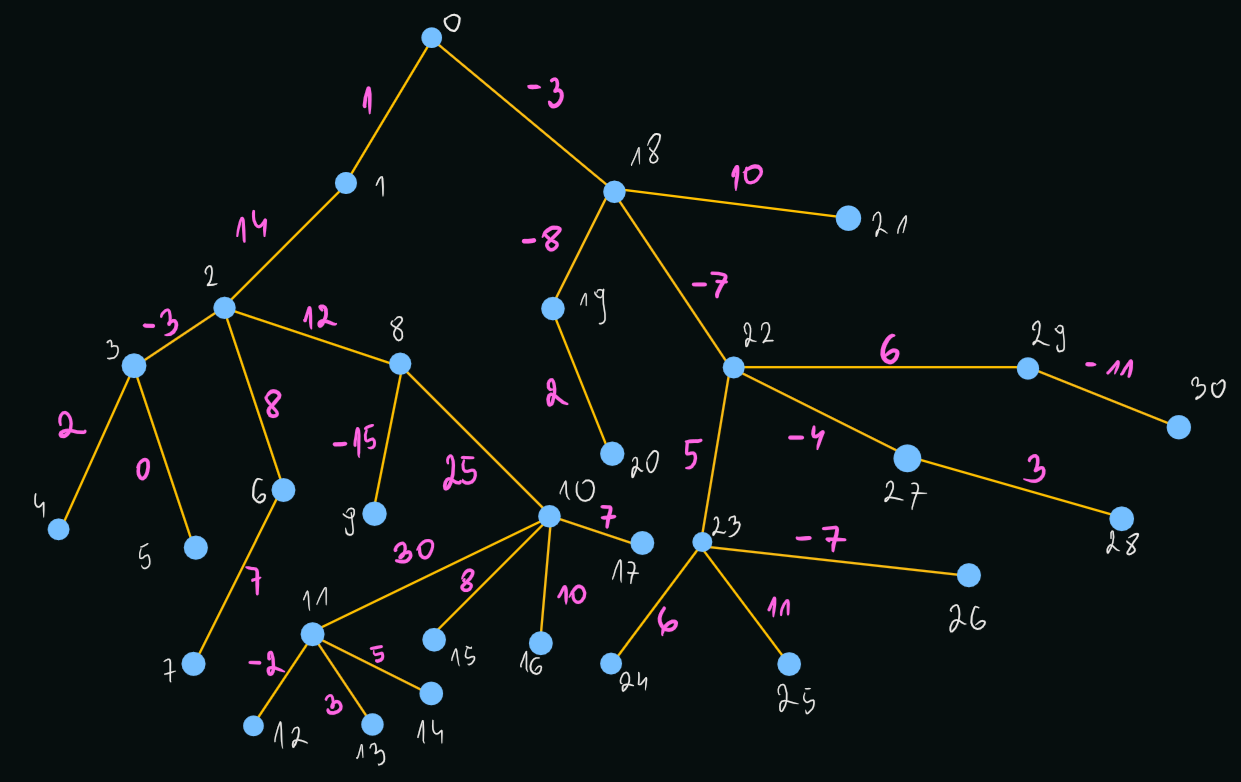

In [20]:
E = [(0, 1, 1), (1, 2, 14), (2, 3, -3), (3, 4, 2), (3, 5, 0), (2, 6, 8), (6, 7, 7), (2, 8, 12), 
     (8, 9, -15), (8, 10, 25), (10, 17, 7), (10, 16, 10), (10, 15, 8), (10, 11, 30), (11, 12, -2), 
     (11, 13, 3), (11, 14, 5), (0, 18, -3), (18, 21, 10), (18, 19, -8), (19, 20, 2), (18, 22, -7), 
     (22, 23, 5), (23, 24, 6), (23, 25, 11), (23, 26, -7), (27, 28, 3), (22, 27, -4), (22, 29, 6), 
     (29, 30, -11)]

T = undirected_weighted_graph_list(E)

print(best_root(T))

(9, 45)
